In [10]:
import numpy as np
import scipy.interpolate as interpolate
from scipy.signal import hilbert
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import f_peakdetect
import f_sample

peakdetect = f_peakdetect.peakdetect
ts = f_sample.ts

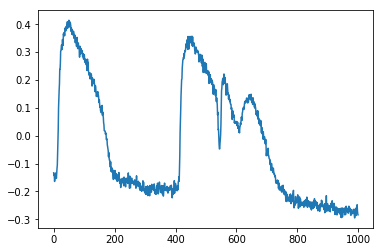

In [4]:
plt.plot(ts)

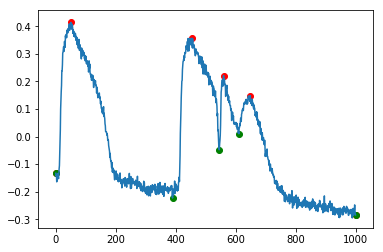

In [5]:
peaks, bottoms = peakdetect(ts, lookahead=50)

peaks = np.array(peaks)
bottoms = np.array(bottoms)

start = np.array([[0, ts[0]]])
end = np.array([[len(ts), ts[-1]]])

peaks_ = np.concatenate((start,peaks, end))
bottoms_ = np.concatenate((start,bottoms, end))

plt.plot(ts)
plt.scatter(peaks_[:,0], peaks_[:,1], c='red')
plt.scatter(bottoms_[:,0], bottoms_[:,1], c='green')

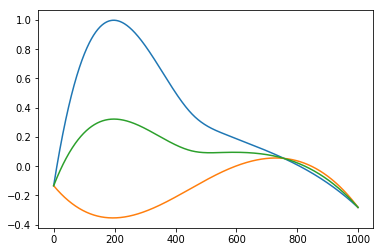

In [7]:
f = interpolate.interp1d(peaks_[:,0], peaks_[:,1], kind="cubic")
_peaks_ = f(np.arange(len(ts)))

f = interpolate.interp1d(bottoms_[:,0], bottoms_[:,1], kind="cubic")
_bottoms_ = f(np.arange(len(ts)))

mean = (_peaks_+_bottoms_)/2

plt.plot(_peaks_)
plt.plot(_bottoms_)
plt.plot(mean)

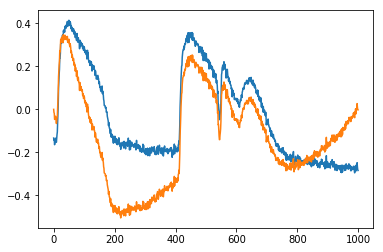

In [12]:
plt.plot(ts)
plt.plot(ts-mean)

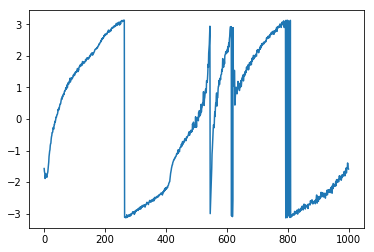

In [13]:
plt.plot(np.angle(hilbert(ts-mean)))